<a href="https://colab.research.google.com/github/Katerine-Chanci-Echeverri/Project-2---Spaceship-Titanic/blob/main/Proyecto2_Spaceship_Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 2 - Parte 4 (base)**

## **Datos personales**

*   **Nombre:** Katerine Chancí Echeverri
*   **ID Coding Dojo:** 80837
*   **Track:** Advanced Machine Learning 



## **Descripción del problema**

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

## **Descripción del conjunto de datos**

| Column                                            | Description                                                                                                                                                                                                                       |
|---------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| PassengerId                                       | A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always. |
| HomePlanet                                        | The planet the passenger departed from, typically their planet of permanent residence.                                                                                                                                            |
| CryoSleep                                         | Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.                                                                  |
| Cabin                                             | The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.                                                                                            |
| Destination                                       | The planet the passenger will be debarking to.                                                                                                                                                                                    |
| Age                                               | The age of the passenger.                                                                                                                                                                                                         |
| VIP                                               | Whether the passenger has paid for special VIP service during the voyage.                                                                                                                                                         |
| RoomService, FoodCourt, ShoppingMall, Spa, VRDeck | Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.                                                                                                                                         |
| Name                                              | The first and last names of the passenger.                                                                                                                                                                                        |
| Transported                                       | Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.                                                                                                             |


¡Ahora estás entrando a la fase de desarrollo del modelo del proyecto!

>*   Garantiza que completes los pasos de preprocesamiento adecuados.
>*   Intenta múltiples modelos y afina los hiperparámetros de cada modelo para optimizar el rendimiento del modelo (incluye todos los modelos e hiperparámetros probados además del modelo final).
>*   Evalúa el rendimiento del modelo con las métricas adecuados para el modelo.
>*   Elije tu modelo de “producción” y justifica esta decisión.
>*   Vuelve a revisar tu código y garantiza que has proporcionados comentarios claros (recuerda que esto es para tu portafolio).
>*   Compromete tu código a GitHub.




## **Solución**


### **Importar librerías**

In [43]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from dython import nominal
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn import set_config
from sklearn.decomposition import PCA
set_config(display='diagram')

### **Cargar el conjunto de datos**

In [2]:
drive.mount("/content/drive")
train = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo 🐉/Proyecto 2/train.csv"
train_df = pd.read_csv(train)
train_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
#Tamaño del DataFrame
train_df.shape

(8693, 14)

### **Elimina columnas innecesarias**

In [4]:
#Elimina columnas innecesarias
#Conjunto de entrenamiento
train_df = train_df.drop(columns = ["PassengerId", "Name", "Cabin"])

In [5]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### **Elimina filas duplicadas**

### Conjunto de entrenamiento

In [6]:
train_df.duplicated().sum() #Revisa cuantos duplicados hay

2266

In [7]:
#Elimina los duplicados en el conjunto de entrenamiento 
train_df = train_df.drop_duplicates()
train_df.duplicated().sum()

0

### **Identifica y aborda valores faltantes**

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6241 non-null   object 
 1   CryoSleep     6219 non-null   object 
 2   Destination   6249 non-null   object 
 3   Age           6307 non-null   float64
 4   VIP           6236 non-null   object 
 5   RoomService   6249 non-null   float64
 6   FoodCourt     6252 non-null   float64
 7   ShoppingMall  6228 non-null   float64
 8   Spa           6245 non-null   float64
 9   VRDeck        6245 non-null   float64
 10  Transported   6427 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 558.6+ KB


Los tipos de datos de todas las columnas concuerdan con el tipo de dato proporcionado en el diccionario. La única escepción es la columna "Age", que si bien es de tipo numérico, es flotante, es mejor trabajar este tipo de dato como entero. Posteriormente nos encargaremos de él. 

In [9]:
train_df.isna().sum()

HomePlanet      186
CryoSleep       208
Destination     178
Age             120
VIP             191
RoomService     178
FoodCourt       175
ShoppingMall    199
Spa             182
VRDeck          182
Transported       0
dtype: int64

Los valores faltantes del conjunto de datos de entremiento serán abordados como sigue: 

>**HomePlanet:** Se reemplazará por el valor más frecuente. 

>**CryoSleep:** Se reemplazará por el valor más frecuente. 

>**Destination:** Se reemplazará por el valor más frecuente. 

>**Age:** Se reemplazará por la media.

>**VIP:** Se reemplazará por el valor más frecuente. 

>**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck:** Se reeamplzarán por la media. 

Como puede observar, los valores faltantes en las columnas categóricas se reemplazarán por el valor más frecuente, mientras que para las columnas numéricas, con la media. 



In [10]:
#Simple Imputer
train_df.isna().any()

HomePlanet       True
CryoSleep        True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Transported     False
dtype: bool

In [11]:
#Instancien los selectores de acuerdo a los tipos de columnas 
num_selector = make_column_selector(dtype_include = "number")
cat_selector = make_column_selector(dtype_include = "object")

In [12]:
num_column = num_selector(train_df)
print(num_column)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [13]:
cat_column  = cat_selector(train_df)
print(cat_column)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


In [14]:
#Instanciar SimpleImputer con strategias de most_frequent, median y mean
freq_imputer   = SimpleImputer(strategy = "most_frequent")
mean_imputer   = SimpleImputer(strategy = "mean")

In [15]:
#Crea tuplas (imputer, selector) para cada tipo de dato 
num_tuple = (mean_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)

#Instancia ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = "passthrough")
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f94b7c05f70>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f94b7c05e20>)])

In [16]:
#Ajusta ColumnTransformer en los datos de entrenamiento 
col_transformer.fit(train_df)

#Transforma los datos de train_df (genera un Numpy Array)
train_imputed = col_transformer.transform(train_df)

#Cambia el resultado anterior a un DataFrame
name_columns = num_column + cat_column + ["Transported"]
train_imputed = pd.DataFrame(train_imputed, columns = name_columns)
train_imputed.isna().any()

Age             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
HomePlanet      False
CryoSleep       False
Destination     False
VIP             False
Transported     False
dtype: bool

In [17]:
train_imputed.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,Europa,False,TRAPPIST-1e,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,Earth,False,TRAPPIST-1e,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,False,TRAPPIST-1e,True,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,False,TRAPPIST-1e,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,Earth,False,TRAPPIST-1e,False,True


In [18]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           6427 non-null   object
 1   RoomService   6427 non-null   object
 2   FoodCourt     6427 non-null   object
 3   ShoppingMall  6427 non-null   object
 4   Spa           6427 non-null   object
 5   VRDeck        6427 non-null   object
 6   HomePlanet    6427 non-null   object
 7   CryoSleep     6427 non-null   object
 8   Destination   6427 non-null   object
 9   VIP           6427 non-null   object
 10  Transported   6427 non-null   object
dtypes: object(11)
memory usage: 552.4+ KB


Después de realizar el Simple Imputer, todos los tipos de dato de las columnas quedan transformados en "object". Ahora, vamos a realizar las transformaciones correspondientes para que queden con e tipo de dato que le pertenecen. 

In [19]:
#Transforma la columna "Age"
train_imputed["Age"] = train_imputed["Age"].astype(int)

#Transforma la columna "RoomService"
train_imputed["RoomService"] = train_imputed["RoomService"].astype(float)

#Transforma la columna "FoodCourt"
train_imputed["FoodCourt"] = train_imputed["FoodCourt"].astype(float)

#Transforma la columna "ShoppingMall"
train_imputed["ShoppingMall"] = train_imputed["ShoppingMall"].astype(float)

#Transforma la columna "Spa"
train_imputed["Spa"] = train_imputed["Spa"].astype(float)

#Transforma la columna "VRDeck"
train_imputed["VRDeck"] = train_imputed["VRDeck"].astype(float)

#Transforma la columna "CryoSleep"
train_imputed["CryoSleep"] = train_imputed["CryoSleep"].astype(str)

#Transforma la columna "VIP"
train_imputed["VIP"] = train_imputed["VIP"].astype(str)

#Transforma la columna "Transported"
train_imputed["Transported"] = train_imputed["Transported"].astype(str)

In [20]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           6427 non-null   int64  
 1   RoomService   6427 non-null   float64
 2   FoodCourt     6427 non-null   float64
 3   ShoppingMall  6427 non-null   float64
 4   Spa           6427 non-null   float64
 5   VRDeck        6427 non-null   float64
 6   HomePlanet    6427 non-null   object 
 7   CryoSleep     6427 non-null   object 
 8   Destination   6427 non-null   object 
 9   VIP           6427 non-null   object 
 10  Transported   6427 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 552.4+ KB


### **Identifica y corrige las inconsistencias en los datos para los valores categóricos**

### Conjunto de entrenamiento 

In [21]:
#"HomePlanet" 
train_imputed["HomePlanet"].value_counts()

Earth     3693
Europa    1464
Mars      1270
Name: HomePlanet, dtype: int64

In [22]:
#"CryoSleep"
train_imputed["CryoSleep"].value_counts()

False    5373
True     1054
Name: CryoSleep, dtype: int64

In [23]:
#"Destination"
train_imputed["Destination"].value_counts()

TRAPPIST-1e      4571
55 Cancri e      1289
PSO J318.5-22     567
Name: Destination, dtype: int64

In [24]:
#"VIP"
train_imputed["VIP"].value_counts()

False    6230
True      197
Name: VIP, dtype: int64

No se encontró inconsistencia en los datos categóricos del conjunto de entrenamiento. 

### **Producir visuales univariantes para el objetivo y todas las características**

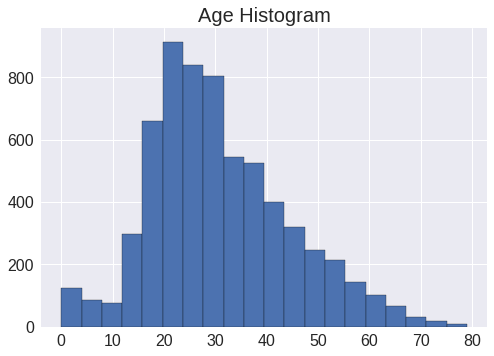

In [25]:
#Histogram ("Age" column)
plt.style.use("seaborn")
train_imputed["Age"].hist(bins = 20, edgecolor = "black");
plt.title("Age Histogram", fontsize = 20)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

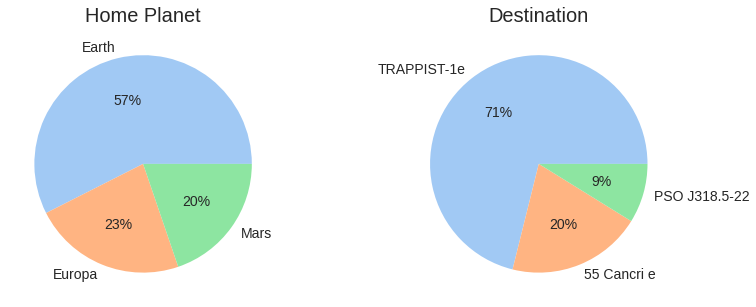

In [26]:
#Pie Chart
plt.figure(figsize = (13,5))

#"HomePlanet"
plt.subplot(1,2,1)
homep_counts = train_imputed["HomePlanet"].value_counts()
labels = ["Earth", "Europa", "Mars"]
colors = sns.color_palette('pastel')[0:5]

plt.pie(homep_counts, labels = labels, textprops={'fontsize': 14}, colors = colors, autopct='%.0f%%');
plt.title("Home Planet", fontsize = 20);

#"Destination"
plt.subplot(1,2,2)
destination_counts = train_imputed["Destination"].value_counts()
labels = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"]
colors = sns.color_palette('pastel')[0:5]

plt.pie(destination_counts, labels = labels, textprops={'fontsize': 14}, colors = colors, autopct='%.0f%%');
plt.title("Destination", fontsize = 20);

ValueError: ignored

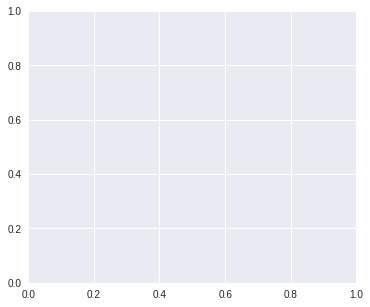

In [27]:
#Histogram 
plt.figure(figsize = (20,5))

#"CryoSleep"
plt.subplot(1,3,1)
plt.style.use("seaborn")
train_imputed["CryoSleep"].astype(int).hist(edgecolor = "black");
plt.title("Cryo Sleep", fontsize = 20)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

#"VIP"
plt.subplot(1,3,2)
plt.style.use("seaborn")
train_imputed["VIP"].astype(int).hist(edgecolor = "black");
plt.title("VIP", fontsize = 20)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

#"Transported"
plt.subplot(1,3,3)
plt.style.use("seaborn")
train_imputed["Transported"].astype(int).hist(edgecolor = "black");
plt.title("Transported", fontsize = 20)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

### **Producir un mapa de calor de correlación e identificar cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra**

In [ ]:
#Necesitaremos la librería dython 
#!pip install dython

In [ ]:
#nominal.associations(train_imputed, nominal_columns = ["HomePlanet", "CryoSleep", 
#                                                       "Destination", "VIP", 
#                                                      "Transported"]);

### **Featuring Engineering**

Se sumaran las entradas de las columnas "RoomService", "FoodCourt", "ShoppingMall", "Spa", y "VRDeck", ya que representa los gastos de los pasajeros en los servicios de lujo del Titanic. Todos, están en las mismas unidades. 

In [28]:
train_imputed["TotalExpenses"] = train_imputed["RoomService"] + train_imputed["FoodCourt"] + train_imputed["ShoppingMall"] + train_imputed["Spa"] + train_imputed["VRDeck"]
train_imputed = train_imputed.drop(columns = ["RoomService", "FoodCourt",
                                              "ShoppingMall", "Spa", "VRDeck"], axis = 1)
train_imputed.head()

,Age,HomePlanet,CryoSleep,Destination,VIP,Transported,TotalExpenses
0,39,Europa,False,TRAPPIST-1e,False,False,0.0
1,24,Earth,False,TRAPPIST-1e,False,True,736.0
2,58,Europa,False,TRAPPIST-1e,True,False,10383.0
3,33,Europa,False,TRAPPIST-1e,False,False,5176.0
4,16,Earth,False,TRAPPIST-1e,False,True,1091.0


### **Definde la matriz de características y el vector objetivo**

In [30]:
#Binariza la columna objetivo 
train_imputed["Transported"] = train_imputed["Transported"].map({"False": 0, 
                                                                 "True": 1})
train_imputed.head()

,Age,HomePlanet,CryoSleep,Destination,VIP,Transported,TotalExpenses
0,39,Europa,False,TRAPPIST-1e,False,0,0.0
1,24,Earth,False,TRAPPIST-1e,False,1,736.0
2,58,Europa,False,TRAPPIST-1e,True,0,10383.0
3,33,Europa,False,TRAPPIST-1e,False,0,5176.0
4,16,Earth,False,TRAPPIST-1e,False,1,1091.0


In [31]:
X = train_imputed.drop(columns = "Transported")
y = train_imputed["Transported"]

### **Train-test split**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### **Escala los datos numéricos y aplica OHE para los datos categóricos**

In [33]:
#Scaler
scaler = StandardScaler()

#OHE
ohe = OneHotEncoder(handle_unknown = "ignore", sparse = False)

In [40]:
#Tuplas para el preprocesamiento 
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

#Hace ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, 
                                          remainder = "passthrough")

col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f94b7c05f70>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f94b7c05e20>)])

In [41]:
#Transforma los datos
X_train_processed = col_transformer.transform(X_train)
X_test_processed  = col_transformer.transform(X_test)

In [42]:
#Visualiza las transformaciones en forma de DataFrame
column_names = col_transformer.get_feature_names_out(X_train.columns)
X_train = pd.DataFrame(X_train_processed, columns = column_names)
X_test = pd.DataFrame(X_test_processed, columns = column_names)
X_train.head()

,standardscaler__Age,standardscaler__TotalExpenses,onehotencoder__HomePlanet_Earth,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__CryoSleep_False,onehotencoder__CryoSleep_True,onehotencoder__Destination_55 Cancri e,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__VIP_False,onehotencoder__VIP_True
0,-0.481156,-0.413585,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.334785,-0.635668,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.042044,-0.371450,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-2.018049,-0.501346,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,-1.286195,-0.294466,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [46]:
X_train.shape

(4820, 12)

### **Reducción de dimensionalidad (PCA)**

In [44]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(X_train)

PCA()

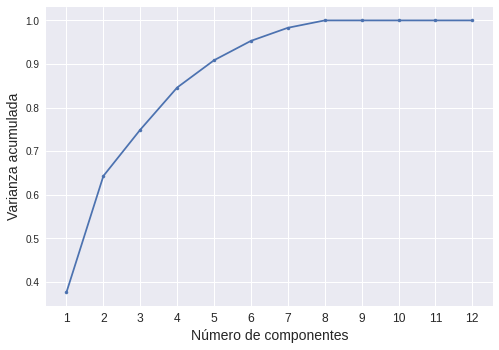

In [52]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 13), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks = range(1,13), fontsize = 12);
plt.xlabel("Número de componentes", fontsize = 14)
plt.ylabel("Varianza acumulada", fontsize = 14);

El gráfico anterior muestra la varianza acumulada explicada a medida que aumenta el número de componentes principales devueltos.  Como puedes ver, existen aumentos drásticos en la proporción de una varianza explicada al principio, pero esto comienza a nivelarse a medida que vamos añadiendo más componentes. El primer componente principal siempre explicará la mayor parte de la varianza. Los componentes sucesivos seguirán explicando más, pero para reducir el número de características, necesitamos estar dispuestos a sacrificar parte de esta explicación.

**Visualización del gráfico de sedimentación**

Podemos visualizar la contribución individual de cada componente principal utilizando un gráfico de sedimentación (scree plot):

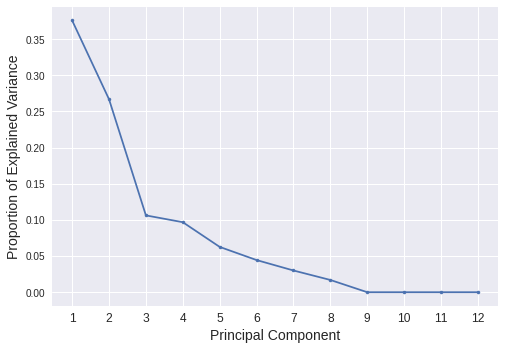

In [55]:
# Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1, 13), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 13), fontsize = 12)
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('Proportion of Explained Variance', fontsize = 14);

Un gráfico de sedimentación transmite la misma información que un gráfico acumulado, pero hace un seguimiento de la contribución de cada componente por separado.  Como pueden observar, el primer componente explicar la proporción más grande de la varianza, y cada componente adicional contribuye cada vez menos.  Aunque este gráfico está disminuyendo, recuerda que al aumentar el número de los componentes siempre disminuye la varianza (acumulada) explicada en total.

### **Método del codo**

Según el gráfico de arriba, ¿cuántos componentes principales deberíamos mantener? En el “codo” o el punto de inflexión en el gráfico anterior se pueden ver alrededor de 8 componentes principales.  Aquí es donde no conseguimos muchas ventajas más allá de aumentar el número de componentes, por lo que representa un buen balance. 

El código de abajo muestra cómo especificar el número de componentes para devolver cuando se instancia ACP:

In [56]:
# PCA with 8 components
pca8 = PCA(n_components = 8)

### **Modelos de Machine Learning**

Ya que este es un problema de clasificación binaria usaremos los modelos de Random Forest, KNN y Regresión logística. 

**1. Random Forest**

In [57]:
#Instancia el modelo 
randomf = RandomForestClassifier()

# Create a modeling pipeline
randomf_pipe = make_pipeline(pca8, randomf)
randomf_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('randomforestclassifier', RandomForestClassifier())])

In [58]:
#Evalua el modelo
print('Training accuracy:', randomf_pipe.score(X_train, y_train))
print('Testing accuracy:', randomf_pipe.score(X_test, y_test))

Training accuracy: 0.9578838174273859
Testing accuracy: 0.627255756067206


Como observamos, el modelo está sobreajustado. Para mejorar nuestro modelo, encontraremos el valor óptimo del hiperparámetro max_depth. 

In [70]:
#Calcula el valor de max_depth óptimo 

max_depth_range = list(range(2, 20))
# Lista para almacenar la puntuación para cada valor de max_depth:
accuracy = []
for depth in max_depth_range:
    randomf = RandomForestClassifier(max_depth = depth, 
                             random_state = 42)
    randomf_pipe = make_pipeline(pca8, randomf)
    randomf_pipe.fit(X_train, y_train)
    score = randomf_pipe.score(X_test, y_test)
    accuracy.append(score)

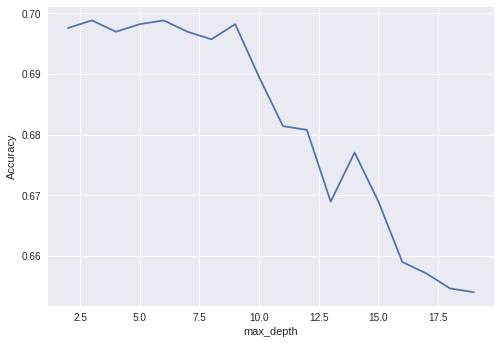

In [71]:
#Qué valor de max_depth lleva a una accuracy más alta
plt.plot(max_depth_range, accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy');

Probemos con n valor de max_depth de 3 y de 6. 

In [74]:
#max_depth = 3
#Instancia el modelo 
randomf3 = RandomForestClassifier(max_depth = 3)

# Create a modeling pipeline
randomf_pipe3 = make_pipeline(pca8, randomf3)
randomf_pipe3.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3))])

In [75]:
#Evalua el modelo
print('Training accuracy:', randomf_pipe3.score(X_train, y_train))
print('Testing accuracy:', randomf_pipe3.score(X_test, y_test))

Training accuracy: 0.7093360995850623
Testing accuracy: 0.6994399502177971


In [66]:
#max_depth = 6
#Instancia el modelo 
randomf6 = RandomForestClassifier(max_depth = 6)

# Create a modeling pipeline
randomf_pipe6 = make_pipeline(pca8, randomf6)
randomf_pipe6.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6))])

In [67]:
#Evalua el modelo
print('Training accuracy:', randomf_pipe6.score(X_train, y_train))
print('Testing accuracy:', randomf_pipe6.score(X_test, y_test))

Training accuracy: 0.7192946058091286
Testing accuracy: 0.6981953951462352


Obsrvamos que se obtiene un mejor resultado cuando usamos un max_depth = 6. Aunque el accuracy en los datos de entrenamiento disminuyó de 0.95 a 0.72, el accuracy en los datos de prueba aumentó de 0.62 a 0.69. Ahora, nuestro modelo no está tan sobreajustado. 

**2. KNN**

In [68]:
#Instancia el modelo 
knn = KNeighborsClassifier()

# Create a modeling pipeline
knn_pipe = make_pipeline(pca8, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [69]:
#Evalua el modelo
print('Training accuracy:', knn_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pipe.score(X_test, y_test))

Training accuracy: 0.7574688796680498
Testing accuracy: 0.6459240821406347


Vamos a mejorar un poco más nuestro modelo encontrando el valor óptimo del hiperpárametro n_neighbors. 

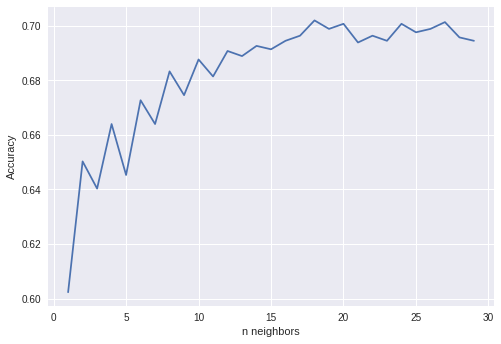

In [78]:
#Encuentra el valor de n_neighbors óptimo para nuestro conjunto de datos
n_neighbors_range = list(range(1, 30))
accuracy = []
for k in n_neighbors_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn_pipe = make_pipeline(pca8, knn)
    knn_pipe.fit(X_train, y_train)
    score = knn_pipe.score(X_test, y_test)
    accuracy.append(score)

plt.plot(n_neighbors_range, accuracy)
plt.xlabel('n neighbors')
plt.ylabel('Accuracy');

Encontramos que el valor de n_neighbors que maximiza el accuracy es aproximadamente 18 o 27. Observemos con cuál obtenemos mejores resultados:

In [79]:
#n_neighbors = 18
#Instancia el modelo 
knn18 = KNeighborsClassifier(n_neighbors = 18)

# Create a modeling pipeline
knn_pipe18 = make_pipeline(pca8, knn18)
knn_pipe18.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=18))])

In [80]:
#Evalua el modelo
print('Training accuracy:', knn_pipe18.score(X_train, y_train))
print('Testing accuracy:', knn_pipe18.score(X_test, y_test))

Training accuracy: 0.7157676348547718
Testing accuracy: 0.70130678282514


In [81]:
#n_neighbors = 27
#Instancia el modelo 
knn27 = KNeighborsClassifier(n_neighbors = 27)

# Create a modeling pipeline
knn_pipe27 = make_pipeline(pca8, knn27)
knn_pipe27.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=27))])

In [82]:
#Evalua el modelo
print('Training accuracy:', knn_pipe27.score(X_train, y_train))
print('Testing accuracy:', knn_pipe27.score(X_test, y_test))

Training accuracy: 0.7101659751037345
Testing accuracy: 0.70130678282514


Aunque se obtienen resultados bastante similares, con el valor de n_neighbors = 18 se obtiene un mejor resultado para los datos de entrenamiento y disminuyendo el sobreajuste del modelo. 

**3. Regresión logística**

In [86]:
#Instancia el modelo 
logreg = LogisticRegression(random_state = 42, max_iter = 1000, 
                            multi_class = "ovr")

# Create a modeling pipeline
logreg_pipe = make_pipeline(pca8, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, multi_class='ovr',
                                    random_state=42))])

In [87]:
#Evalua el modelo
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.7026970954356846
Testing accuracy: 0.6913503422526447


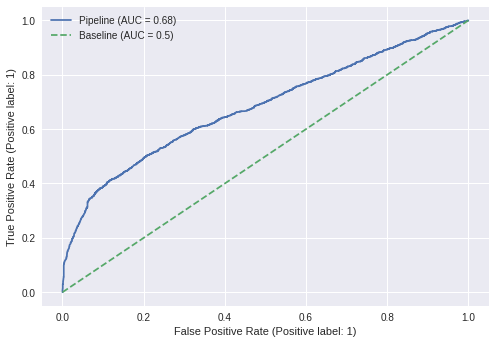

In [88]:
#Visualiza la curva ROC
RocCurveDisplay.from_estimator(logreg_pipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

De la curva ROC anterior, podemos observar que el modelo de regresión logística no se ajusta muy bien a nuestros datos. 

### **Evaluación de los modelos: métricas de clasificación** 

**1. Random Forest**

In [92]:
#Guarda las predicicones
randomf6_preds = randomf_pipe6.predict(X_test)

report_randomf6 = classification_report(y_test, randomf6_preds)
print(report_randomf6)

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       977
           1       0.74      0.36      0.48       630

    accuracy                           0.70      1607
   macro avg       0.71      0.64      0.63      1607
weighted avg       0.71      0.70      0.67      1607



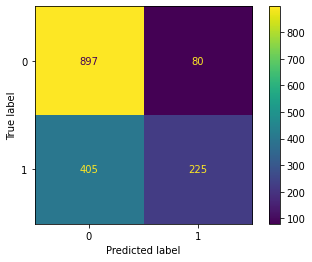

In [93]:
sns.reset_orig() 
cm_randomf6 = confusion_matrix(y_test, randomf6_preds, labels = randomf_pipe6.classes_)
disp_randomf6 = ConfusionMatrixDisplay(confusion_matrix = cm_randomf6,
                                   display_labels = randomf_pipe6.classes_)

disp_randomf6.plot();

**2. KNN**

In [94]:
#Guarda las predicicones
knn18_preds = knn_pipe18.predict(X_test)

report_knn18 = classification_report(y_test, knn18_preds)
print(report_knn18)

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       977
           1       0.74      0.37      0.49       630

    accuracy                           0.70      1607
   macro avg       0.72      0.64      0.64      1607
weighted avg       0.71      0.70      0.67      1607



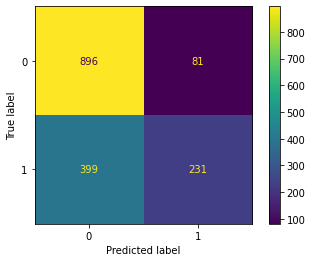

In [95]:
sns.reset_orig() 
cm_knn18 = confusion_matrix(y_test, knn18_preds, labels = knn_pipe18.classes_)
disp_knn18 = ConfusionMatrixDisplay(confusion_matrix = cm_knn18,
                                   display_labels = knn_pipe18.classes_)

disp_knn18.plot();

**3. Regresión logística**

In [96]:
#Guarda las predicicones
logreg_preds = logreg_pipe.predict(X_test)

report_logreg = classification_report(y_test, logreg_preds)
print(report_logreg)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       977
           1       0.70      0.37      0.48       630

    accuracy                           0.69      1607
   macro avg       0.70      0.63      0.63      1607
weighted avg       0.69      0.69      0.66      1607



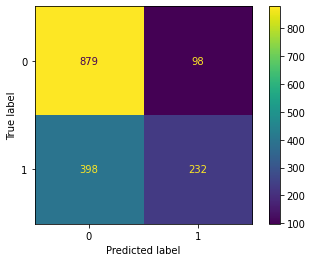

In [97]:
sns.reset_orig() 
cm_logreg = confusion_matrix(y_test, logreg_preds, labels = logreg_pipe.classes_)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix = cm_logreg,
                                   display_labels = logreg_pipe.classes_)

disp_logreg.plot();

## **Conclusión**

De lo anterior, podemos concluir que el modelo de clasificación que mejor se ajusta a nuestros datos es el de KNN, ya que obtuvo el valor de accuracy más alto, tanto para los datos de entrenamiento como para los datos de prueba: 0.71 y 0.70, respectivamente, y es el modelo que más disminuye los falsos negativos, que es el tipo de error que más deberíamos penalizar. 